In [1]:
#1.Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 2. Load data

In [4]:
data = pd.read_csv('/Users/acer/Desktop/AI/K_means/Countries-exercise.csv')
data.head(20)


,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
5,Aland,19.953288,60.214887
6,Andorra,1.560544,42.542291
7,United Arab Emirates,54.300167,23.905282
8,Argentina,-65.179807,-35.381349
9,Armenia,44.929933,40.289526


In [5]:
data.shape

(241, 3)

In [6]:
X = data.iloc[:, 1:3]
X

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [7]:
X.shape

(241, 2)

In [8]:
X = np.array(X)

In [9]:
X.shape

(241, 2)

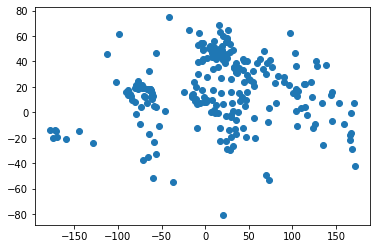

In [10]:
plt.scatter(X[:,0], X[:,1])

In [11]:
# 3 Choose K centroids

In [12]:
def initialize_K_centroids(X, K):
    m,n = X.shape
    k_rand = np.ones((K, n))
    k_rand = X[np.random.choice(range(len(X)), K, replace=False),:]
    return k_rand

In [13]:
centroids_init = initialize_K_centroids(X, 4)

In [14]:
centroids_init

array([[-59.35238956, -51.74483954],
       [103.7377241 ,  18.50217433],
       [ 63.14001528,  41.75554225],
       [ 16.40412899,  45.08047631]])

In [15]:
# 4 Compute distances

In [16]:
def find_closest_centroids(X, centroids):
    m = len(X)
    c = np.zeros(m)
    for i in range(m):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        c[i] = np.argmin(distances)
    return c

In [17]:
idx = find_closest_centroids(X, centroids_init)
idx

array([0., 2., 3., 0., 3., 3., 3., 2., 0., 2., 0., 0., 1., 1., 0., 1., 3.,
       2., 3., 3., 3., 3., 1., 3., 2., 3., 0., 3., 0., 3., 0., 3., 0., 0.,
       0., 1., 1., 3., 3., 3., 0., 1., 3., 3., 3., 3., 0., 0., 2., 3., 0.,
       0., 0., 0., 3., 3., 3., 3., 2., 0., 3., 0., 3., 0., 3., 2., 3., 3.,
       2., 3., 1., 0., 3., 3., 1., 3., 3., 2., 3., 3., 3., 3., 3., 3., 3.,
       0., 3., 0., 1., 0., 1., 1., 0., 3., 0., 3., 1., 3., 1., 1., 1., 3.,
       2., 2., 3., 3., 3., 0., 3., 3., 1., 2., 2., 2., 2., 1., 0., 0., 1.,
       3., 2., 1., 3., 3., 3., 0., 3., 1., 3., 3., 3., 3., 1., 0., 3., 3.,
       3., 2., 1., 0., 1., 3., 3., 3., 1., 3., 1., 1., 2., 3., 0., 1., 3.,
       1., 3., 1., 3., 1., 3., 0., 0., 3., 3., 1., 1., 1., 2., 2., 0., 0.,
       0., 1., 1., 1., 3., 0., 1., 3., 0., 3., 0., 2., 3., 2., 3., 3., 2.,
       3., 3., 3., 1., 0., 3., 1., 3., 0., 3., 2., 2., 3., 3., 3., 0., 3.,
       3., 3., 3., 0., 2., 3., 0., 3., 3., 1., 2., 2., 1., 0., 0., 3., 3.,
       1., 3., 3., 3., 0.

In [18]:
# 5 Update centroids

In [19]:
def compute_means(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points_belong_k = X[np.where(idx == k)]
        centroids[k] = np.mean(points_belong_k, axis=0,)
    return centroids

In [20]:
centroids = compute_means(X, idx, 4)
centroids

array([[-80.73800292,   1.93162591],
       [118.83498411,   4.55018048],
       [ 53.63093684,  23.27086924],
       [ 10.26707861,  28.96850882]])

In [21]:
# 6 

In [22]:
def find_k_means(X, K, max_iters=10):
    _, n = X.shape
    centroids = initialize_K_centroids(X, K) 
    centroid_history = np.zeros((max_iters, K, n))
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_means(X, idx, K)
    
    return centroids, idx

In [23]:
centroids, idx = find_k_means(X, 4)

In [24]:
centroids

array([[-82.03484643,   5.55229685],
       [ 27.55306754,  -4.95988608],
       [123.21952457,  10.19873294],
       [ 20.08603271,  41.24192511]])

In [25]:
idx

array([0., 3., 1., 0., 3., 3., 3., 3., 0., 3., 0., 1., 2., 1., 0., 2., 3.,
       3., 1., 3., 1., 1., 2., 3., 3., 0., 0., 3., 0., 3., 0., 0., 0., 0.,
       0., 2., 2., 1., 1., 3., 0., 2., 1., 1., 1., 1., 0., 0., 1., 3., 0.,
       0., 0., 0., 3., 3., 3., 3., 1., 0., 3., 0., 3., 0., 3., 1., 3., 3.,
       1., 3., 2., 0., 3., 3., 2., 1., 3., 3., 3., 1., 1., 3., 3., 1., 3.,
       0., 3., 0., 2., 0., 2., 1., 0., 3., 0., 3., 2., 3., 2., 2., 1., 3.,
       3., 3., 3., 3., 3., 0., 3., 3., 2., 2., 3., 1., 3., 2., 0., 0., 2.,
       3., 3., 2., 3., 1., 3., 0., 3., 2., 1., 3., 3., 3., 2., 0., 3., 3.,
       3., 1., 1., 0., 2., 3., 3., 3., 2., 3., 2., 2., 1., 3., 0., 1., 1.,
       2., 1., 2., 3., 2., 1., 0., 0., 3., 3., 2., 2., 2., 1., 3., 0., 0.,
       0., 2., 2., 2., 3., 0., 2., 3., 0., 3., 0., 3., 3., 2., 1., 3., 3.,
       1., 1., 3., 2., 0., 1., 2., 1., 0., 3., 1., 1., 0., 3., 1., 0., 3.,
       3., 3., 1., 0., 1., 3., 0., 1., 1., 2., 3., 3., 2., 0., 0., 3., 3.,
       2., 1., 1., 3., 0.